<a href="https://colab.research.google.com/github/justin-hsieh/DS-Unit-2-Applied-Modeling/blob/master/assignment_applied_modeling_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction.
- [ ] If you log-transformed your regression target, then convert your PDP back to original units. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox.I Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python package:
    # category_encoders, version >= 2.0
    !pip install --upgrade category_encoders pdpbox plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Applied-Modeling.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module3')

In [0]:
import pandas as pd
import seaborn as sns
import category_encoders as ce
#import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.preprocessing import StandardScaler
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [10]:
df = pd.read_csv('/content/openpowerlifting.csv')
drops = ['Squat4Kg', 'Bench4Kg', 'Deadlift4Kg','Country','Place','Squat1Kg',
        'Squat2Kg','Squat3Kg','Bench1Kg','Bench2Kg','Bench3Kg','Deadlift1Kg',
        'Deadlift2Kg','Deadlift3Kg']
df = df.drop(columns=drops)
df.dropna(inplace=True)
df.shape

(39339, 23)

In [11]:
X = df.drop(columns='Best3SquatKg')
y = df['Best3SquatKg']

Xtrain, X_test, ytrain,y_test = train_test_split(X,y, test_size=0.20,  
                              random_state=42)

X_train, X_val, y_train,y_val = train_test_split(Xtrain,ytrain, test_size=0.25,
                              random_state=42)

X_train.shape, X_test.shape, X_val.shape

((23603, 22), (7868, 22), (7868, 22))

In [12]:
model = LinearRegression()

features = ['Sex','Equipment','Age','BodyweightKg','Best3BenchKg','Best3DeadliftKg']

X = X_train[features].replace({'M':0,'F':1,'Raw':2,'Single-ply':3,
                              'Wraps':4,'Multi-ply':5})
y = y_train

model.fit(X,y)

y_pred = model.predict(X_val[features].replace({'M':0,'F':1,'Raw':2,'Single-ply':3,
                              'Wraps':4,'Multi-ply':5}))
print('Validation Accuracy', r2_score(y_pred, y_val))
print('Mean Absolute Error:', mean_absolute_error(y_val, y_pred))  

Validation Accuracy 0.8572403772279494
Mean Absolute Error: 16.035194349527995


In [28]:
lr = make_pipeline(
    ce.OrdinalEncoder(), # Not ideal for Linear Regression 
    #StandardScaler(), 
    LinearRegression()
)
lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Name', 'Sex', 'Event', 'Equipment',
                                      'AgeClass', 'Division', 'WeightClassKg',
                                      'Tested', 'Federation', 'Date',
                                      'MeetCountry', 'MeetState', 'MeetName'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Name',
                                          'data_type': dtype('O'),
                                          'mapping': Bruce Lee                  1
Kyle Milnes                2
Ki...
Region 6 Division 1 Championships                  2501
Legacy Boys Quad Meet                              2502
Paris High School                                  2503
Pilbara Powerfest                                  2504
Frisco ISD Powerlifting Meet             

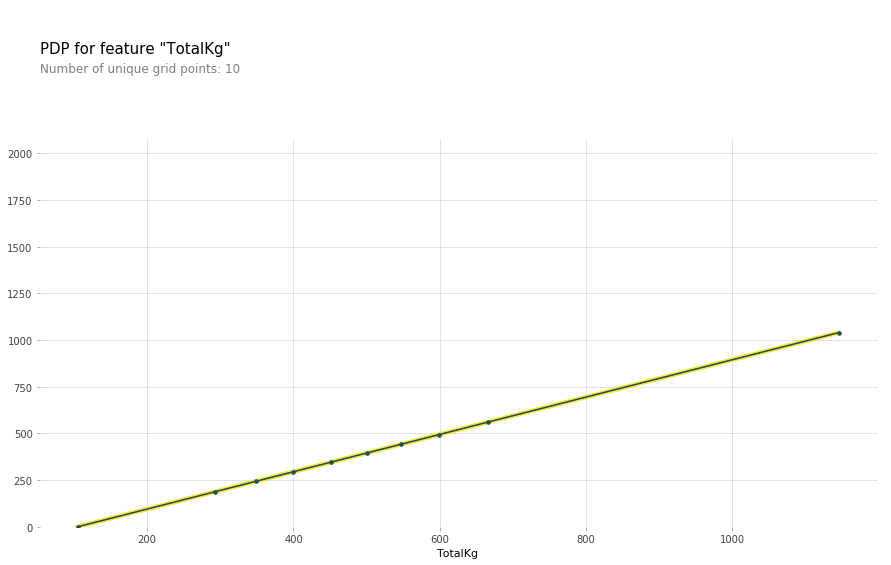

In [29]:


feature = 'TotalKg'

isolated = pdp_isolate(
    model=lr, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature, plot_lines=True,frac_to_plot=100);